In [1]:
import pandas as pd    
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv')
# drop the row with the baseline case
data = data[data.Case!="baseline"]

In [3]:
data["production_cost_USD_AF"] = (data["total_energy_cost_USD"] + 766000 ) / (data["total_water_production_m3"]/1233.48)
baseline_production_cost = data["production_cost_USD_AF"][data.Case=="with_algae"].values[0]
baseline_energy_cost = data["total_energy_cost_USD"][data.Case=="with_algae"].values[0]

data["pct_savings_energy_cost"] = (baseline_energy_cost - data["total_energy_cost_USD"])/baseline_energy_cost*100
data["pct_savings_production_cost"] = (baseline_production_cost - data["production_cost_USD_AF"])/baseline_production_cost*100

In [28]:
data["pct_savings_energy_cost"].values[1:].mean()
data["pct_savings_energy_cost"].values[1:]

array([27.95469499, 33.70901017])

In [ ]:
compiled_vals = np.hstack([(15+4)/2, 30.83185258072828])

lbs = np.array([4, 27.95469499])
ubs = np.array([15, 33.70901017])
height = ubs - lbs

In [11]:
plt.rcParams.update({'font.size': 32,
                    'xtick.major.size': 10,
                    'xtick.major.width': 3,
                    'ytick.major.size': 10,
                    'ytick.major.width': 3,
                    'axes.linewidth': 2.5,
                    'axes.edgecolor': 'black',})

NameError: name 'height' is not defined

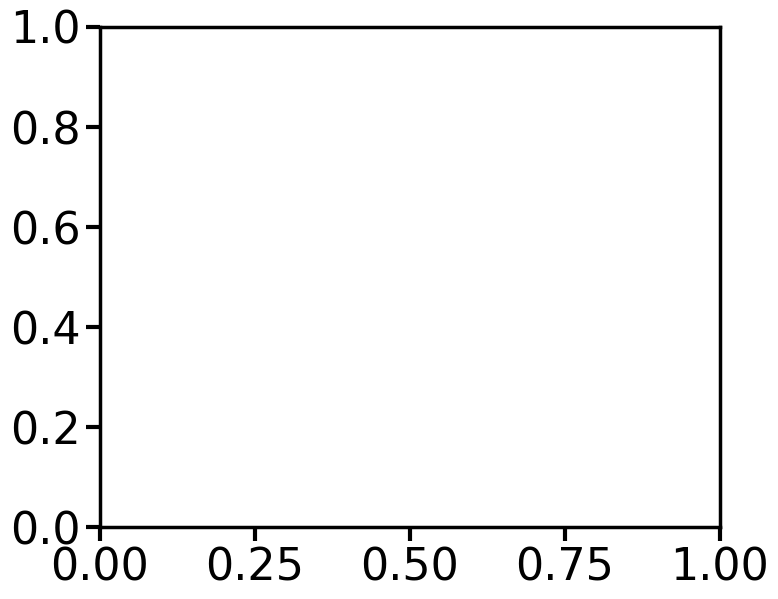

In [ ]:
fig, ax = plt.subplots(figsize=(8,6.5))
x = [1, 2]

ax.bar(x,
        compiled_vals,
        yerr=[[compiled_vals[0]-4, compiled_vals[1]-27.95469499], [15 - compiled_vals[0], 33.70901017-compiled_vals[1]]],
        width=[0.8, 0.8],
        color="#FFA500",
        edgecolor="black",
        linewidth=2.5,)
ax.set_xticks(np.arange(1,3,1))
ax.set_xticklabels(["Tariff\nsavings","Demand\nresponse"])
ax.set_ylim(0,40)
ax.set_ylabel("Percent Savings (%)")
plt.tight_layout()



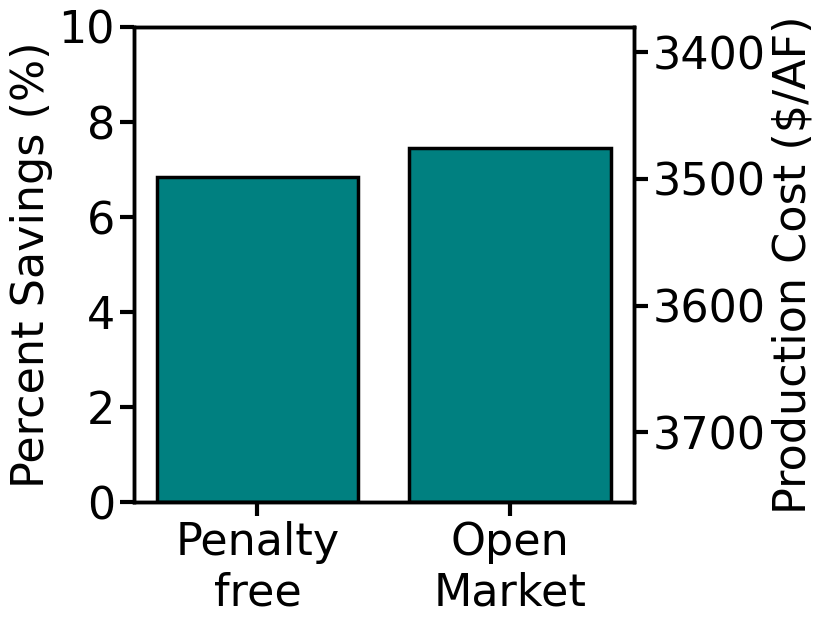

In [6]:
fig, ax = plt.subplots(figsize=(9,7))
ax.bar(np.arange(1,3,1), 
        data["pct_savings_production_cost"].values[1:],
        color="#008080",
        edgecolor="black",
        linewidth=2.5,)
# create a dual y-axis that is a function of the first y axis
ax2 = ax.twinx()
ax2.set_ylim(baseline_production_cost,0.9*baseline_production_cost)
ax2.set_ylabel("Production Cost ($/AF)")

ax.set_xticks(np.arange(1,3,1))
ax.set_xticklabels(["Penalty\nfree","Open\nMarket"])
ax.set_ylim(0,10)
ax.set_ylabel("Percent Savings (%)")
plt.tight_layout()